In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn')

---
# A. DATA CLEANING & PREPROCESSING

In [2]:
df = pd.read_csv('hotel_bookings.csv',usecols=['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
df = df.iloc[:5000,:]
display(df.head())
print('\nTotal data : {} rows and {} columns\n\n'.format(df.shape[0], df.shape[1]))

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1



Total data : 5000 rows and 16 columns




## A. 1) Check null values from each feature

In [3]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

### There are 16 columns and country column has 2 missing values

## A. 2) Check Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

## A. 3) Drop Missing Values

In [5]:
df = df.dropna()
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## A. 4) Check All Unique Values from Categorical Features

In [6]:
print('hotel columns:\t\t\t {}'.format(df['hotel'].unique()))
print('meal columns:\t\t\t {}'.format(df['meal'].unique()))
print('country columns:\t\t {}'.format(df['country'].unique()))
print('market_segment columns:\t\t {}'.format(df['market_segment'].unique()))
print('distribution_channel columns:\t {}'.format(df['distribution_channel'].unique()))
print('reserved_room_type columns:\t {}'.format(df['reserved_room_type'].unique()))
print('deposit_type columns:\t\t {}'.format(df['deposit_type'].unique()))
print('customer_type columns:\t\t {}'.format(df['customer_type'].unique()))

hotel columns:			 ['Resort Hotel']
meal columns:			 ['BB' 'FB' 'HB' 'SC' 'Undefined']
country columns:		 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN']
market_segment columns:		 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
distribution_channel columns:	 ['Direct' 'Corporate' 'TA/TO']
reserved_room_type columns:	 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L']
deposit_type columns:		 ['No Deposit' 'Refundable' 'Non Refund']
customer_type columns:		 ['Transient' 'Contract' 'Transient-Party' 'Group']


---
# B. EXPLORATORY DATA ANALYSIS

## B. 1) Split Dataset into 2 variables (`x` as features and `y` as target)

,hotel,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


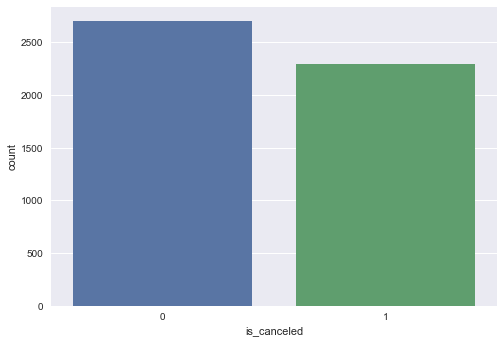

In [7]:
x = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']
display(x.head())
sns.countplot(x='is_canceled', data=df)
plt.show()

## B. 2) Most Visitors Based on Country

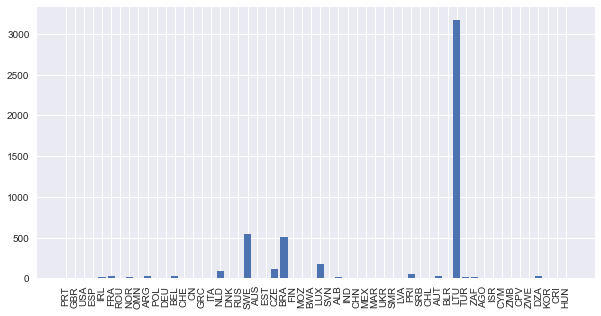

In [8]:
plt.figure(figsize=(10,5))
plt.bar(x = x.country.unique(), height = x.groupby(['country'])['hotel'].count())
plt.xticks(rotation='vertical')
plt.show()

In [9]:
x.groupby(['country'])['hotel'].count().sort_values(ascending=False)[:5]

country
PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
Name: hotel, dtype: int64

### 5 Negara sebagai pengunjung hotel terbanyak adalah `PRT`, `ESP`, `GBR`, `IRL` dan `FRA`. `PRT` menjadi negara yang memiliki paling banyak warga negaranya sebagai pengunjung di hotel ini dan hampir 6-10 kali lipat dibandingkan negara lain

<Figure size 720x360 with 0 Axes>

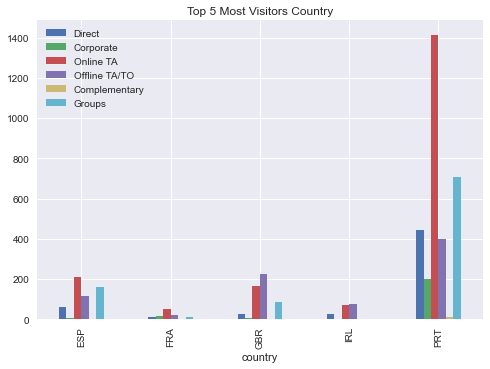

In [10]:
x_copy = x[['country', 'market_segment']].copy()
for i in x_copy.market_segment.unique():
    x_copy[i] = x_copy['market_segment'].apply(lambda x : 1 if i == x else 0)
plt.figure(figsize=(10,5))
(x_copy[x_copy['country'].isin(['PRT', 'ESP', 'GBR', 'IRL', 'FRA'])].groupby(['country']).sum()).plot(kind='bar')
plt.title('Top 5 Most Visitors Country')
plt.show()

### Sekitar 70% market_segment tertinggi dari 5 negara teratas adalah `Online TA`

## B. 3) Analyze Adults column based on Market Segments

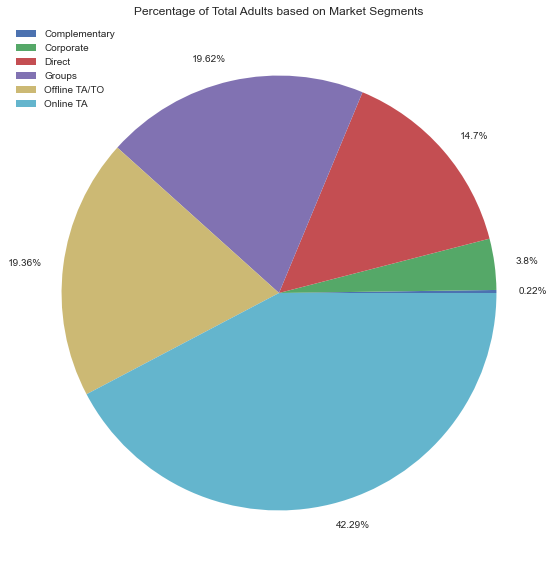

In [11]:
segment = x.groupby(['market_segment'])['adults'].sum()
total = [str(round(i/segment.values.sum()*100, 2))+'%' for i in segment.values]
plt.figure(figsize=(10,10))
plt.pie(segment,labels=total)
plt.title('Percentage of Total Adults based on Market Segments')
plt.legend(segment.index, loc='upper left')
plt.show()

### `Online TA` menjadi market segment terbanyak dalam jumlah populasi `adults`

## B. 4) Analyze Adults column that brings baby or children

In [12]:
x.groupby(['adults'])['children', 'babies'].mean()

,children,babies
adults,,
0,0.000000,0.000000
1,0.024502,0.001531
2,0.127186,0.017485
3,0.212329,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
10,0.000000,0.000000
20,0.000000,0.000000


### Rata-rata terbanyak yang membawa anak-anak adalah jumlah pengunjung dengan total 3 orang dan yang membawa bayi adalah 2 orang dewasa, dari data tersebut dapat dikatakan bahwa yang membawa anak-anak/bayi adalah pengunjung berkeluarga

## B. 5) Analyze meal column

In [13]:
x_copy = x[['market_segment', 'meal']].copy()
for i in x_copy.meal.unique():
    x_copy[i] = x_copy['meal'].apply(lambda x : 1 if i == x else 0)
x_copy.groupby(['market_segment']).sum()

,BB,FB,HB,SC,Undefined
market_segment,,,,,
Complementary,8,2,1,0,0
Corporate,254,0,4,3,0
Direct,476,20,119,2,0
Groups,271,276,315,5,158
Offline TA/TO,556,21,295,2,54
Online TA,1852,0,303,1,0


### `Groups` dan `Offline TA/TO` adalah market segment yang paling banyak tidak memesan meal packages ketika melakukan booking di hotel ini sedangkan `Online TA` adalah pemesan meal packages yang paling banyak dari semua segment

## B. 6) Analyze Special Requests column

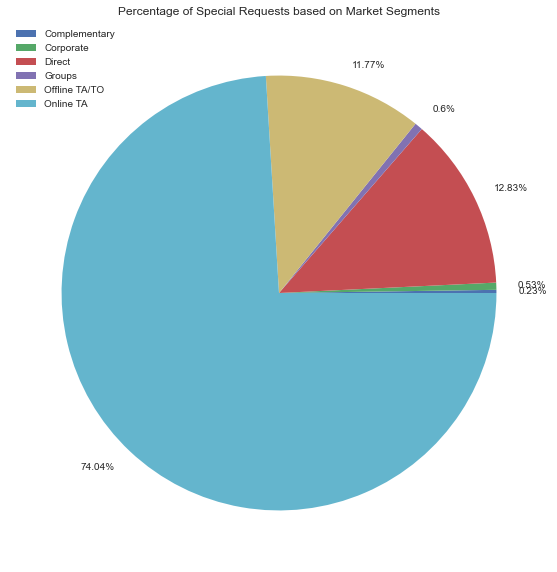

In [14]:
segment = x.groupby(['market_segment'])['total_of_special_requests'].sum()
total = [str(round(i/segment.values.sum()*100, 2))+'%' for i in segment.values]
plt.figure(figsize=(10,10))
plt.pie(segment,labels=total)
plt.title('Percentage of Special Requests based on Market Segments')
plt.legend(segment.index, loc='upper left')
plt.show()

### `Online TA` sebagai market segment sebagai pengunjung yang paling banyak di hotel ini juga memiliki `Special Requests` dengan presentasi terbesar, bisa dikatakan bahwa segment ini biasa memiliki request perlengkapan atau ruangan untuk melakukan rapat/meeting, outbound, atau presentasi didalam kegiatannya

---
# C. Model Building & Hyper-Parameter Tuning

## C. 1) LabelEncoding all Categorical Features

In [15]:
from sklearn.preprocessing import LabelEncoder
x.drop(['hotel'], axis=1, inplace=True)
cat_list = ['meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']

for i in cat_list:
    lst = x[i].value_counts().index.values.tolist()
    le = LabelEncoder().fit(lst)
    x[i] = le.transform(x[i])

display(x.head())
display(x.describe())

,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,2,0.0,0,0,43,2,1,1,3,0,0,2,0,0
1,2,0.0,0,0,43,2,1,1,4,0,0,2,0,0
2,1,0.0,0,0,24,2,1,0,0,0,0,2,0,0
3,1,0.0,0,0,24,1,0,0,0,0,0,2,0,0
4,2,0.0,0,0,24,5,2,0,0,0,0,2,0,1


,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.970388,0.115646,0.014806,0.656263,35.893157,3.813926,1.676471,1.014606,0.206883,0.120248,1.772709,2.118848,0.093838,0.601841
std,1.566332,0.444916,0.122433,1.079533,10.666061,1.265366,0.573557,1.514914,0.612080,0.361420,13.548022,0.614579,0.293001,0.823128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,24.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,43.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,43.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
max,55.000000,10.000000,2.000000,4.000000,55.000000,5.000000,2.000000,7.000000,17.000000,2.000000,122.000000,3.000000,2.000000,4.000000


### Label Encoder harus dilakukan terhadap features yang bersifat categorical dan tidak bernilai numeric karena MachineLearning Algorithm hanya dapat melakukan penghitungan kalkulasi terhadap nilai numeric bukan string

## C. 2) Normalize `country` feature

In [16]:
from sklearn.preprocessing import MinMaxScaler

x['country'] = MinMaxScaler().fit_transform(x[['country']].values)
display(x['country'].describe())

count    4998.000000
mean        0.652603
std         0.193928
min         0.000000
25%         0.436364
50%         0.781818
75%         0.781818
max         1.000000
Name: country, dtype: float64

### alasan dilakukannya normalisasi terhadap column `country` adalah karena nilai column tersebut memiliki jarak nilai yang jauh lebih tinggi dibandingkan column yang lain

## C. 3) Split Data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## C. 4.1) Build 3 Models with standard parameter

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_dt = dt.predict(x_test)

## C. 4.2) Evaluate All Models

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='ConfusionMatrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[409 127]
 [ 57 407]]


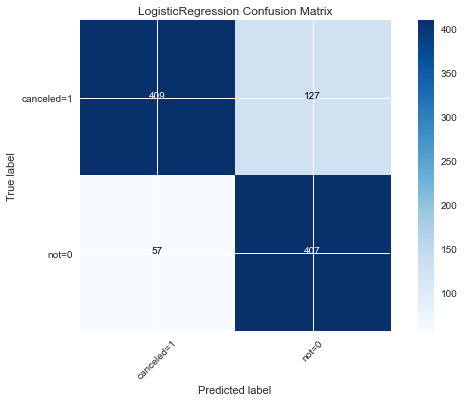

Confusion matrix, without normalization
[[460  76]
 [ 54 410]]


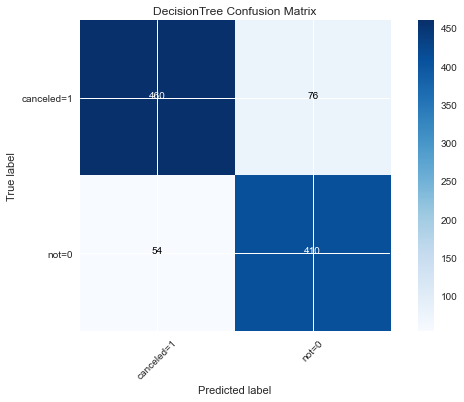

Confusion matrix, without normalization
[[459  77]
 [ 48 416]]


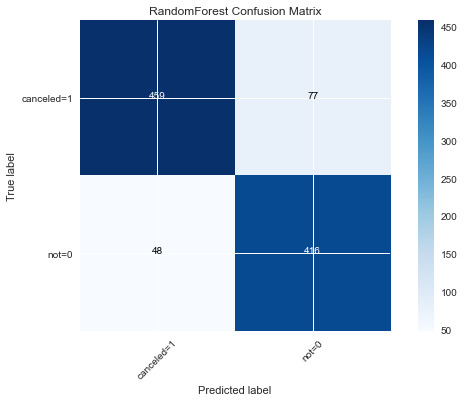

In [21]:
cnf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cnf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix_lr, classes=['canceled=1','not=0'], normalize=False, title='LogisticRegression Confusion Matrix')
plt.show()
plot_confusion_matrix(cnf_matrix_dt, classes=['canceled=1','not=0'], normalize=False, title='DecisionTree Confusion Matrix')
plt.show()
plot_confusion_matrix(cnf_matrix_rf, classes=['canceled=1','not=0'], normalize=False, title='RandomForest Confusion Matrix')
plt.show()

In [22]:
print('\n\t\t\tLogisticRegression Model\n\n',classification_report(y_test, y_pred_lr))
print('='*70+'\n\t\t\tRandomForrest Model\n\n',classification_report(y_test, y_pred_rf))
print('='*70+'\n\t\t\tDecisionTreeClassifier Model\n\n',classification_report(y_test, y_pred_dt))


			LogisticRegression Model

               precision    recall  f1-score   support

           0       0.88      0.76      0.82       536
           1       0.76      0.88      0.82       464

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

			RandomForrest Model

               precision    recall  f1-score   support

           0       0.91      0.86      0.88       536
           1       0.84      0.90      0.87       464

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000

			DecisionTreeClassifier Model

               precision    recall  f1-score   support

           0       0.89      0.86      0.88       536
           1       0.84      0.88      0.86       464

    accuracy                           0.87      1000
   macro avg       0.87      0.87     

## C. 4.3) Conclusions

<ol>
    <li>Based On Confusion Matrix
        <ul>
            <li>Logistic Regression mempunyai nilai False Negative yang paling tiggi dibandingkan dengan yang lain yaitu 127 dimana sisi ini dapat menimbulkan kerugian bagi pihak hotel karena para <i>visitors</i> yang sebenarnya melakukan pembatalan terhadap kamar hotel namun dianggap tidak batal sehingga kamar tersebut justru nantinya akan kosong pada tanggal dimana <i>visitors</i> tersebut melakukan pembatalan
            <li>Disisi lain justru Random Forest Classifier memiliki nilai True Negative paling rendah yaitu 77 namun nilai ini juga masih dianggap terlalu tinggi untuk terjadi kesalahan pada prediksi Machine Learning karena menyebabkan paling tidak 77 kamar akan kosong pada tanggal-tanggal tertentu karena dianggap kamar tersebut tidak dibatalkan oleh <i>visitors</i> sehingga pihak management tidak membuka kamar-kamar tersebut untuk para <i>visitors</i> lain yang ingin menginap
        </ul>
    <li>Based on Classification Report
        <ul>
            <li>Nilai <i>accuracy</i> terbaik berdasarkan model diraih oleh DecisionTreeClassifier dan RandomForest dengan nilai yang sama yaitu 87%
            <li>Apabila dilihat  dari sisi <i>precision</i>, RandomForest memiliki nilai terbaik ntah itu untuk prediksi nilai yang dibatalkan atau tidak dibatalkan
            <li>Berdasarkan Classification Report dari 3 model diatas dapat dikatakan bahwa 3 model ini cukup baik (namun tidak presisi) untuk melakukan prediksi pembatalan, ini juga dipengaruhi oleh banyaknya jumlah data antara <i>visitors</i> yang melakukan pembatalan dan yang tidak memiliki jumlah yang tidak terlalu jauh bedanya (tidak terjadinya <i>imbalanced data</i>)
        </ul>
</ol>

## C. 5.1) Build 3 Models with Hyper-Parameter Tuning

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [24]:
lr_pipe = Pipeline([('classifier', LogisticRegression())])

lr_params = {'classifier__penalty' : ['l1','l2','elasticnet'],
                    'classifier__dual' : [True, False],
                    'classifier__fit_intercept' : [True, False],
                    'classifier__solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
                    'classifier__random_state' : [0,42],
                    }

lr_grid_search = GridSearchCV(estimator=lr_pipe, param_grid=lr_params, scoring='f1', cv=5, return_train_score=True)
lr_grid_search.fit(x_train, y_train)
print('Best Score: ', lr_grid_search.best_score_)
print('Best Params: ', lr_grid_search.best_params_)

Best Score:  0.8146355272186394
Best Params:  {'classifier__dual': True, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'liblinear'}


In [25]:
dt_pipe = Pipeline([('classifier', DecisionTreeClassifier())])

dt_params = {'classifier__criterion' : ['gini', 'entropy'],
                    'classifier__splitter' : ['best','random'],
                    'classifier__random_state' : [0,42]
                    }

dt_grid_search = GridSearchCV(estimator=dt_pipe, param_grid=dt_params, scoring='f1', cv=5, return_train_score=True)
dt_grid_search.fit(x_train, y_train)
print('Best Score: ', dt_grid_search.best_score_)
print('Best Params: ', dt_grid_search.best_params_)

Best Score:  0.8477714573856365
Best Params:  {'classifier__criterion': 'entropy', 'classifier__random_state': 42, 'classifier__splitter': 'best'}


In [26]:
rf_pipe = Pipeline([('classifier',RandomForestClassifier())])

rf_params = {'classifier__min_samples_leaf':[1,2,4],
            'classifier__min_samples_split':[2,5,10],
            'classifier__max_depth':[80,100],
            'classifier__n_estimators':[800,1400,1000, 1200]}
rf_grid_search = GridSearchCV(estimator=rf_pipe, param_grid=rf_params, cv=5, return_train_score=True)
rf_grid_search.fit(x_train, y_train)
print('Best Score: ', rf_grid_search.best_score_)
print('Best Parameters :',rf_grid_search.best_params_)

Best Score:  0.8664321026282854
Best Parameters : {'classifier__max_depth': 80, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 800}


## C. 5.2) Build 3 Models Based on Best Parameters from HyperParameter Tuning

In [29]:
lr = LogisticRegression(penalty=lr_grid_search.best_params_['classifier__penalty'],
                        dual=lr_grid_search.best_params_['classifier__dual'],
                        fit_intercept=lr_grid_search.best_params_['classifier__fit_intercept'],
                        solver=lr_grid_search.best_params_['classifier__solver'],
                        random_state=lr_grid_search.best_params_['classifier__random_state']
                        )


rf = DecisionTreeClassifier(criterion=dt_grid_search.best_params_['classifier__criterion'],
                            splitter=dt_grid_search.best_params_['classifier__splitter'],
                            random_state=dt_grid_search.best_params_['classifier__random_state']
                            )

dt = RandomForestClassifier(min_samples_leaf = rf_grid_search.best_params_['classifier__min_samples_leaf'],
                            min_samples_split = rf_grid_search.best_params_['classifier__min_samples_split'],
                            max_depth = rf_grid_search.best_params_['classifier__max_depth'],
                            n_estimators = rf_grid_search.best_params_['classifier__n_estimators']
                            )

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_dt = dt.predict(x_test)

## C. 5.3) Evaluate All HyperParameter-Tuned Models

Confusion matrix, without normalization
[[398 138]
 [ 36 428]]


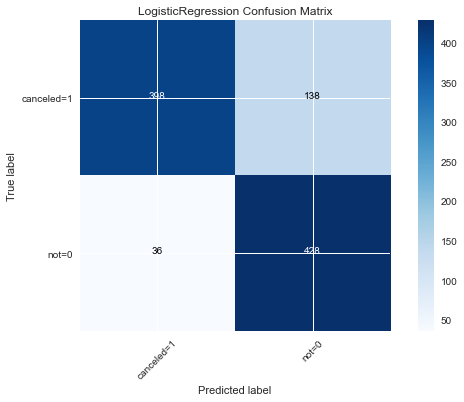

Confusion matrix, without normalization
[[451  85]
 [ 38 426]]


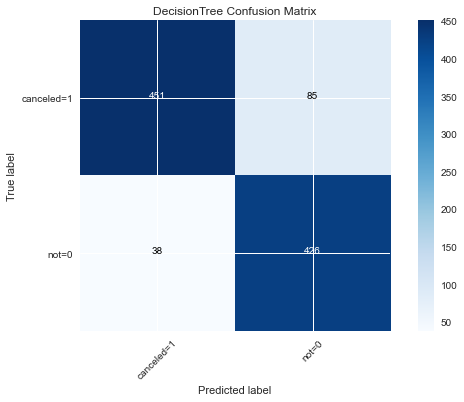

Confusion matrix, without normalization
[[460  76]
 [ 55 409]]


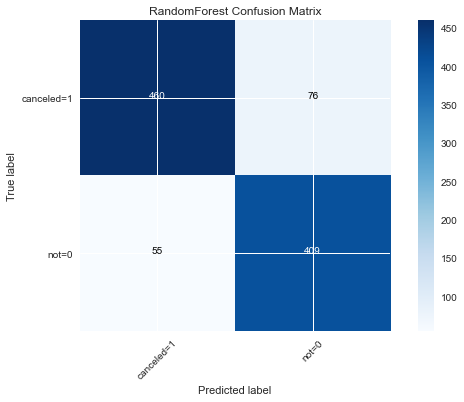

In [30]:
cnf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cnf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix_lr, classes=['canceled=1','not=0'], normalize=False, title='LogisticRegression Confusion Matrix')
plt.show()
plot_confusion_matrix(cnf_matrix_dt, classes=['canceled=1','not=0'], normalize=False, title='DecisionTree Confusion Matrix')
plt.show()
plot_confusion_matrix(cnf_matrix_rf, classes=['canceled=1','not=0'], normalize=False, title='RandomForest Confusion Matrix')
plt.show()

In [32]:
print('\n\tLogisticRegression Model with HyperParameter Tuning\n\n',classification_report(y_test, y_pred_lr))
print('='*70+'\n\tRandomForrest Model with HyperParameter Tuning\n\n',classification_report(y_test, y_pred_rf))
print('='*70+'\n\tDecisionTreeClassifier Model with HyperParameter Tuning\n\n',classification_report(y_test, y_pred_dt))


	LogisticRegression Model with HyperParameter Tuning

               precision    recall  f1-score   support

           0       0.92      0.74      0.82       536
           1       0.76      0.92      0.83       464

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000

	RandomForrest Model with HyperParameter Tuning

               precision    recall  f1-score   support

           0       0.89      0.86      0.88       536
           1       0.84      0.88      0.86       464

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

	DecisionTreeClassifier Model with HyperParameter Tuning

               precision    recall  f1-score   support

           0       0.92      0.84      0.88       536
           1       0.83      0.92      0.87       464

    accuracy     

## C. 5.4) Conclusions

<ol>
    <li>Jenis kesalahan yang dipakai untuk menghitung banyaknya kerugian financial perusahaan yaitu <b>False Negative</b>
    <li>Pengaruh jenis kesalahan ini terhadap kerugian financial perusahaan karena menghitung/memprediksi <i>visitors</i> yang sebenarnya melakukan pembatalan pesanan kamar namun dianggap/diprediksi tidak melakukan pembatalan sehingga menyebabkan kamar tersebut kosong/tidak disewakan pada tanggal-tanggal dimana para <i>visitors</i> tersebut melakukan pembatalan
    <li>Untuk menekan besarnya kesalahan yang dapat dilakukan oleh MachineLearning model adalah dengan meningkatkan nilai <i>precision</i> dan <i>recall</i> pada classification report
        <ul>
            <li>Pada 3 model dengan hyperparameter tuning diatas, RandomForest Classifier memiliki nilai <i>precision</i> (terhadap data yang menunjuk <i>visitors</i> melakukan pembatalan) tertinggi dibandingkan dengan yang lain yaitu 84% namun nilai <i>recall</i> (terhadap data yang menunjuk <i>visitors</i> melakukan pembatalan) dengan score tertinggi diraih oleh DecisionTreeClassifier yaitu 92%
            <li>Dengan memperhatikan 2 penilaian tersebut, pada pemodelan dengan hyperparameter tuning ini maka <b>DecisionTreeClassifier</b> dengan parameter {'classifier__max_depth': 80, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 800} adalah model terbaik untuk menghindari tingginya nilai dari jenis kesalahan <b>False Negative</b> dibandingkan dengan 2 model lainnya
        </ul>
    <li>Ada beberapa cara terbaik untuk untuk meningkatkan performa MachineLearning model ini untuk bisa menekan jenis kesalahan False Negative, yaitu:
        <ul>
            <li>Menambahkan jumlah data (jumlah data yang saat ini digunakan adalah 50000 observasi), karena semakian besarnya variasi maka bias terhadap target berdasarkan banyaknya features juga akan menurun
            <li>Menambahkan observasi yang memiliki nilai target adalah <i>True</i>(pengunjung melakukan pembatalan)
            <li>Melakukan pendekatan matematika untuk melakukan hyperparameter tuning terhadap model berdasarkan features yang digunakan
        </ul>
</ol>